# [CM3] Decision Trees Classifier

Importing all necessary libraries.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import cross_val_score

In [2]:
# readng clean and normalized covid dataset
df_train = pd.read_csv('cleaned_normalized_coviddata.csv')

In [3]:
df_train.head()

,Day,State ID,Lat,Long_,Active,Incident_Rate,Total_Test_Results,Case_Fatality_Ratio,Testing_Rate,Resident Population 2020 Census,Population Density 2020 Census,Density Rank 2020 Census,SexRatio,Confirmed,Deaths,Recovered
0,2,1,-1.178243,0.304476,-0.200641,0.143976,-0.483393,-0.475230,-1.301745,-0.128579,-0.217013,0.118745,-1.168255,True,False,False
1,2,2,3.607611,-3.031933,-0.448967,-0.290209,-0.569371,-1.797949,2.071154,-0.754174,-0.276752,1.614369,3.491260,True,True,False
2,2,3,-0.945708,-0.944926,0.389043,0.088511,-0.007491,0.075713,-1.268952,0.181561,-0.239163,0.508908,0.384916,True,True,True
3,2,4,-0.741458,0.025816,-0.482359,0.202178,-0.456457,-0.029941,-0.559153,-0.422031,-0.242214,0.573935,-0.546987,True,True,True
4,2,5,-0.552594,-1.365168,4.275448,-0.502417,4.022089,-0.791062,-0.177543,4.903416,-0.122735,-0.921689,0.384916,True,True,False


In [4]:
df_covid = df_train.iloc[:,2:-3]
#Target 1 is Recovered
df_target1 = df_train.iloc[:,-1:]
#Target 2 is Deaths
df_target2 = df_train.iloc[:,-2:-1]
#Target 3 is Confirmed
df_target3 = df_train.iloc[:,-3:-2]
df_covid

,Lat,Long_,Active,Incident_Rate,Total_Test_Results,Case_Fatality_Ratio,Testing_Rate,Resident Population 2020 Census,Population Density 2020 Census,Density Rank 2020 Census,SexRatio
0,-1.178243,0.304476,-0.200641,0.143976,-0.483393,-0.475230,-1.301745,-0.128579,-0.217013,0.118745,-1.168255
1,3.607611,-3.031933,-0.448967,-0.290209,-0.569371,-1.797949,2.071154,-0.754174,-0.276752,1.614369,3.491260
2,-0.945708,-0.944926,0.389043,0.088511,-0.007491,0.075713,-1.268952,0.181561,-0.239163,0.508908,0.384916
3,-0.741458,0.025816,-0.482359,0.202178,-0.456457,-0.029941,-0.559153,-0.422031,-0.242214,0.573935,-0.546987
4,-0.552594,-1.365168,4.275448,-0.502417,4.022089,-0.791062,-0.177543,4.903416,-0.122735,-0.921689,0.384916
...,...,...,...,...,...,...,...,...,...,...,...
1375,0.753675,1.027338,-0.524025,-2.293117,-0.625582,-0.268880,1.273810,-0.767341,-0.234953,0.378854,-0.236352
1376,-0.280277,0.749264,0.400787,-0.559356,-0.005284,-0.533271,-0.745045,0.397324,-0.144153,-0.726607,-0.236352
1377,-0.161357,0.607433,-0.488091,-0.195859,-0.475653,0.063695,0.411132,-0.599582,-0.232024,0.248799,0.074282
1378,0.790345,0.166226,-0.391751,1.287093,0.129655,-0.828583,0.350879,-0.001818,-0.211155,-0.011309,0.384916


## 1. Decision Tree implementation on Target 1:Recovered

### Part 1 : For max depth: {3, 5, 10, None}

## Finding 'K' value in K-fold cross validation 

In [5]:
# Decision Tree on target 1: Recovered, Finding k value in k - fold cross val
accuracies_recovered = []
for k in range(2,26):
    classifier_DecisionTree = DecisionTreeClassifier(max_depth = 10)
    scores = cross_val_score(classifier_DecisionTree, df_covid, df_target1, cv=k)
    accuracies_recovered.append(scores.mean())
accuracies_recovered

[0.8289855072463768,
 0.9159420289855073,
 0.886231884057971,
 0.9210144927536232,
 0.9007246376811594,
 0.8949465649973264,
 0.8971089864229063,
 0.9166737402031521,
 0.9195652173913043,
 0.9123232323232325,
 0.9065217391304348,
 0.9152842396538391,
 0.9152383897281858,
 0.9210144927536231,
 0.9145031408714248,
 0.9210283932904688,
 0.9260746563378142,
 0.9145237523031323,
 0.9217391304347826,
 0.9173604173604175,
 0.920309081599404,
 0.9246376811594202,
 0.9202964307320024,
 0.9217662337662337]

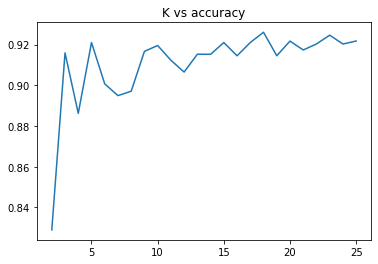

In [6]:
#Plotting the mean accuracy versus the max depth for recovered
plt.title("K vs accuracy")
plt.plot(range(2,26),accuracies_recovered)

### The best accuracy occurs at K = 8 and hence we will do 8 fold cross validation

In [7]:
# Decision tree algorithm is run on the following values of max_depth
max_depth_list = [3,5,10,None]

In [8]:
# Decision Tree on target 1: Recovered, cv = 8
accuracies_recovered1 = []
for max_depth in max_depth_list:
    classifier_DecisionTree = DecisionTreeClassifier(max_depth = max_depth)
    scores = cross_val_score(classifier_DecisionTree, df_covid, df_target1, cv=8)
    accuracies_recovered1.append(scores.mean())
accuracies_recovered1

[0.8282531254200833,
 0.8855104852802795,
 0.8927737263072993,
 0.8971299905901331]

Text(0, 0.5, 'Mean Accuracy for Target 1:Recovered')

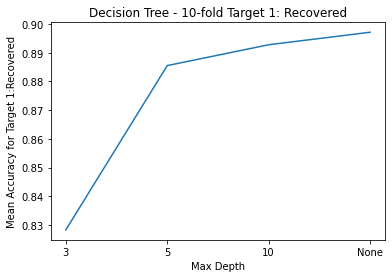

In [9]:
#Plotting the mean accuracy versus the max depth for recovered
plt.title("Decision Tree - 10-fold Target 1: Recovered")
plt.plot([1,2,3,4], accuracies_recovered1)
plt.xticks([1,2,3,4],['3','5','10','None'])
plt.xlabel('Max Depth')
plt.ylabel('Mean Accuracy for Target 1:Recovered')

### So the max accuracy came for max depth = 10 for target 1: Recovered

### Part 2 : For None: (grow until leaf contains 2 datapoints)

In [10]:
# Decision Tree on target 1: Recovered for none
accuracy1 = []
classifier_DecisionTree = DecisionTreeClassifier()
scores = cross_val_score(classifier_DecisionTree, df_covid, df_target1, cv=10)
accuracy1.append(scores.mean())
print("Accuracy for Target1: Recovered", accuracy1)

Accuracy for Target1: Recovered [0.9173913043478261]


### We get maximum accuracy with depth set at 10 for target 1 "Recovered". Meaning, we are growing the tree all the way as the depth is increasing but for None we do have some class ambiguitites in the leaf nodes as the accuracy dropped.

In [11]:
import graphviz
from sklearn import tree

In [12]:
# Plotting the decision tree for target 1: Recovered
classifier_DecisionTree = DecisionTreeClassifier(max_depth = 3)
classifier_DecisionTree.fit(df_covid,df_target1)
dot_data = tree.export_graphviz(classifier_DecisionTree,out_file = None,
                               feature_names = df_covid.columns,
                               class_names = 'Recovered',
                               filled = True, rounded = True,
                               special_characters = True)
graph = graphviz.Source(dot_data)


### For the sake of convenience, the max depth value is selected as 3 to visualize the decision tree 


## Explaining the Decision Tree Plot
#### 1) Examining the tree plot, we can notice that the first feature that is chosen for split is 'Long_'. Long_ ≤ -1.166
#### means that every Long  -1.166 or lower will follow the True arrow (to the left), and the rest will follow the False arrow (to the right).The Gini value shows that the split was done almost in the middle.
#### 2) gini = 0.0 means all the 150 samples got the same result.
#### 3) Lat ≤ -1.002 means that every Lat  -1.002 or lower will follow the True arrow (to the left), and the rest will follow the False arrow (to the right).The Gini value shows that the split was done almost in the middle.
#### 4) Further, Active ≤ -0.455 means that every active  -0.455 or lower will follow the True arrow (to the left), and the rest will follow the False arrow (to the right). The gini = 0.147 means that about 14,7% of the samples would go in one direction.
#### 4.1) gini = 0.0 means all the 3 samples got the same result.
#### 4.2) gini = 0.115 means all the 11,5% samples got the same result.
#### 5) Further, SexRatio ≤ -0.702 means that every active  -0.702 or lower will follow the True arrow (to the left), and the rest will follow the False arrow (to the right). The gini = 0.333 means that about 33,3% of the samples would go in one direction.
#### 5.1) gini = 0.499 means split was done in the middle. Out of 270 SexRatio  ≤ -0.702 samples 128 went in one direction and rest 142 in other.
#### 5.2) gini = 0.216 means all the 21,6% samples got same result. Out of 810 SexRatio > -0.702 samples 100 went in one direction and rest 710 in other.









Maximum depth refers to the the length of the longest path from a root to a leaf. this is to set a minimum number of training inputs to use on each leaf,that is how we stop splitting.

## 2. Decision Tree implementation on Target 2: Deaths

### Part 1 : For max depth: {3, 5, 10, None}

In [13]:
# Decision Tree on target 2: Deaths, cv = 8
accuracies_deaths = []
for max_depth in max_depth_list:
    classifier_DecisionTree = DecisionTreeClassifier(max_depth = max_depth)
    scores = cross_val_score(classifier_DecisionTree, df_covid, df_target2, cv=8)
    accuracies_deaths.append(scores.mean())
accuracies_deaths

[0.9115934601424922, 0.90648524667294, 0.8832882443876865, 0.8804064726441726]

Text(0, 0.5, 'Mean Accuracy for Target 2:Deaths')

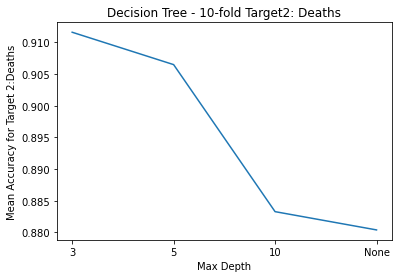

In [14]:
#Plotting the mean accuracy versus the max depth for deaths
plt.title("Decision Tree - 10-fold Target2: Deaths")
plt.plot([1,2,3,4], accuracies_deaths)
plt.xticks([1,2,3,4],['3','5','10','None'])
plt.xlabel('Max Depth')
plt.ylabel('Mean Accuracy for Target 2:Deaths')

### We get maximum accuracy with depth set at 3 for target 2 "Deaths"

### Part 2 : For None: (grow until leaf contains 2 datapoints)

In [15]:
# Decision Tree on target 2: Deaths for none
accuracy2 = []
classifier_DecisionTree = DecisionTreeClassifier()
scores = cross_val_score(classifier_DecisionTree, df_covid, df_target2, cv=10)
accuracy2.append(scores.mean())
print("Accuracy for Target2: Deaths", accuracy2)

Accuracy for Target2: Deaths [0.8789855072463768]


### We get maximum accuracy with depth set at 3 for target 2 "Deaths". The accuracy is not growing all the way as the depth is increasing but for None we can see that the accuracy increased slightly.

In [15]:
# Plotting the decision tree for target 2: Deaths
classifier_DecisionTree = DecisionTreeClassifier(max_depth = 3)
classifier_DecisionTree.fit(df_covid,df_target2)
dot_data = tree.export_graphviz(classifier_DecisionTree,out_file = None,
                               feature_names = df_covid.columns,
                               class_names = 'Deaths',
                               filled = True, rounded = True,
                               special_characters = True)
graph = graphviz.Source(dot_data)


## 3. Decision Tree implementation on Target 3: Confirmed

### Part 1 : For max depth: {3, 5, 10, None}

In [17]:
# Decision Tree on target 3: Confirmed, cv = 10
accuracies_confirmed = []
for max_depth in max_depth_list:
    classifier_DecisionTree = DecisionTreeClassifier(max_depth = max_depth)
    scores = cross_val_score(classifier_DecisionTree, df_covid, df_target3, cv=10)
    accuracies_confirmed.append(scores.mean())
accuracies_confirmed

[0.9623188405797102, 0.958695652173913, 0.9369565217391305, 0.9398550724637682]

Text(0, 0.5, 'Mean Accuracy for Target 3:Confirmed')

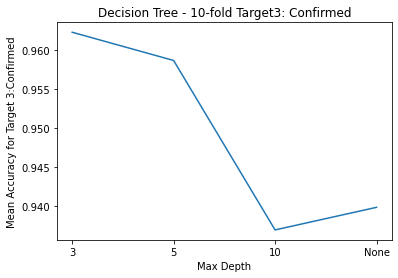

In [18]:
#Plotting the mean accuracy versus the max depth for confirmed
plt.title("Decision Tree - 10-fold Target3: Confirmed")
plt.plot([1,2,3,4], accuracies_confirmed)
plt.xticks([1,2,3,4],['3','5','10','None'])
plt.xlabel('Max Depth')
plt.ylabel('Mean Accuracy for Target 3:Confirmed')

### We get maximum accuracy with depth set at 3 for target 3 "Confirmed".

### Part 2 : For None: (grow until leaf contains 2 datapoints)

In [19]:
# Decision Tree on target 3: Confirmed
accuracy3 = []
classifier_DecisionTree = DecisionTreeClassifier()
scores = cross_val_score(classifier_DecisionTree, df_covid, df_target3, cv=10)
accuracy3.append(scores.mean())
print("Accuracy for Target2: Deaths", accuracy3)

Accuracy for Target2: Deaths [0.9333333333333332]


### We get maximum accuracy with depth set at 3 for target 3 "Confirmed". The accuracy is falling all the way as the depth is increasing and for None its the lowest.

In [16]:
# Plotting the decision tree for target 3: Confirmed
classifier_DecisionTree = DecisionTreeClassifier(max_depth = 3)
classifier_DecisionTree.fit(df_covid,df_target3)
dot_data = tree.export_graphviz(classifier_DecisionTree,out_file = None,
                               feature_names = df_covid.columns,
                               class_names = 'Deaths',
                               filled = True, rounded = True,
                               special_characters = True)
graph = graphviz.Source(dot_data)
